# Estimation of our impact

* [...for complete project](#complete-project)
* [...per book](#per-book)

→ [Go back to overview of all statistics](./index.html)

In [7]:
from datetime import datetime

print(f"Date of last update: {datetime.now().strftime('%d.%m.%Y, %H:%M')}")

Date of last update: 16.07.2025, 16:19


## Utility functions and imports

In [8]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Markdown
from mfnf import MFNF


def md(text):
    display(Markdown(text))


df = MFNF().aggregate_pageviews()

## <span id="complete-project">Estimation of impact for whole project</span>



#### Lineplot of estimated devices per month

Note: On average there are [~2.8 pageviews per device per month](https://github.com/kulla/analytics-mfnf/blob/main/notebooks/reports/2025-07-16-pageviews-per-user-on-wikibooks.ipynb)

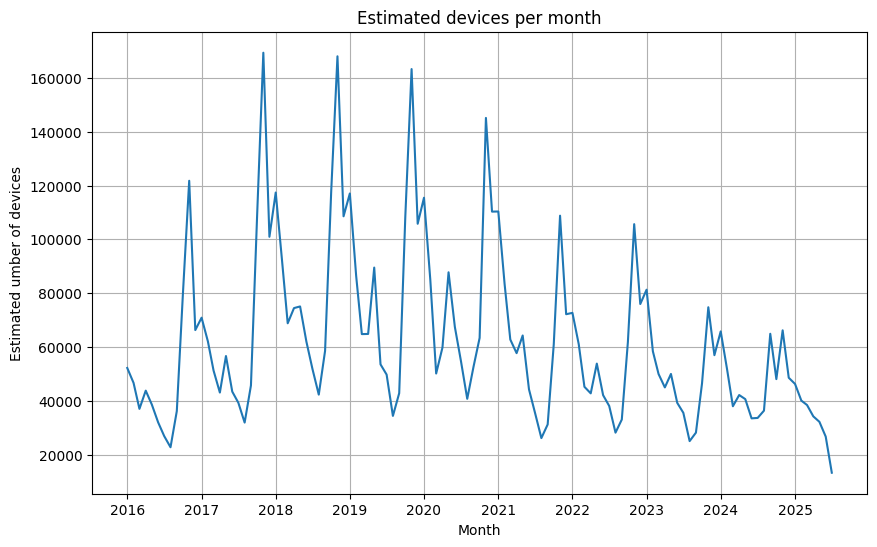

#### Lineplot of estimated reach in target audience

Note: Here we use [200.000 students](https://de.statista.com/statistik/daten/studie/181643/umfrage/studienanfaenger-an-hochschulen-nach-faechergruppen/) as an estimate for the number of students with mathematics in the first semester.

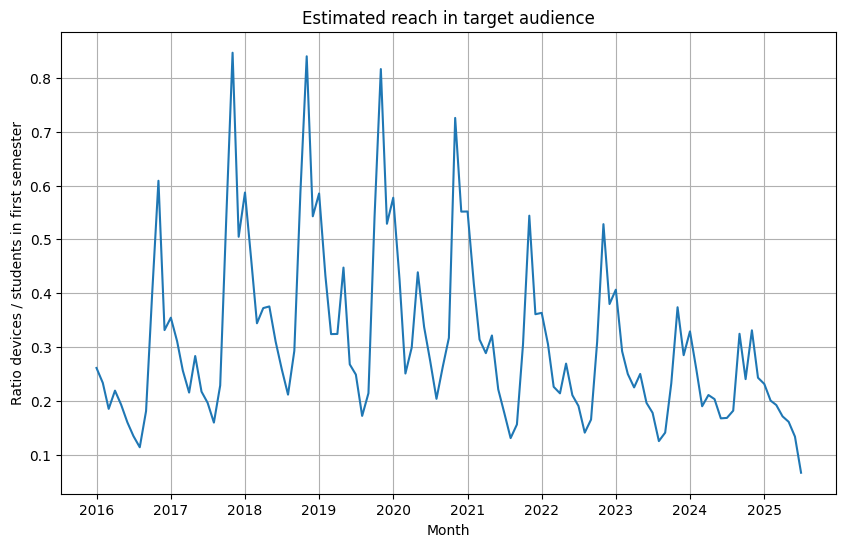

In [12]:
from datetime import datetime, timedelta


def analyze(df):
    #one_year_ago = datetime.now() - timedelta(days=365)
    #df = df[(df["timestamp"] > one_year_ago) & (df["page_name"] is not None)]
    df["month"] = df['timestamp'].dt.to_period('M').dt.to_timestamp()
    df = df[["month", "views"]].groupby("month").sum()
    df["devices"] = df["views"] / 2.803827

    md("#### Lineplot of estimated devices per month")
    md("Note: On average there are [~2.8 pageviews per device per month](https://github.com/kulla/analytics-mfnf/blob/main/notebooks/reports/2025-07-16-pageviews-per-user-on-wikibooks.ipynb) on the German wikibooks project.")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=df.index, y="devices")
    plt.title("Estimated devices per month")
    plt.xlabel("Month")
    plt.ylabel("Estimated umber of devices")
    plt.grid(True)
    plt.show()

    md("#### Lineplot of estimated reach in target audience")
    md("Note: Here we use [200.000 students](https://de.statista.com/statistik/daten/studie/181643/umfrage/studienanfaenger-an-hochschulen-nach-faechergruppen/) as an estimate for the number of students with mathematics in the first semester.")
    df["reach"] = df["devices"]/200000
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x=df.index, y="reach")
    plt.title("Estimated reach in target audience")
    plt.xlabel("Month")
    plt.ylabel("Ratio devices / students in first semester")
    plt.grid(True)
    plt.show()


analyze(df.copy())

## <span id="per-book">Estimation per book</span>

### Analysis 1

#### Lineplot of estimated devices per month

Note: On average there are [~2.8 pageviews per device per month](https://github.com/kulla/analytics-mfnf/blob/main/notebooks/reports/2025-07-16-pageviews-per-user-on-wikibooks.ipynb)

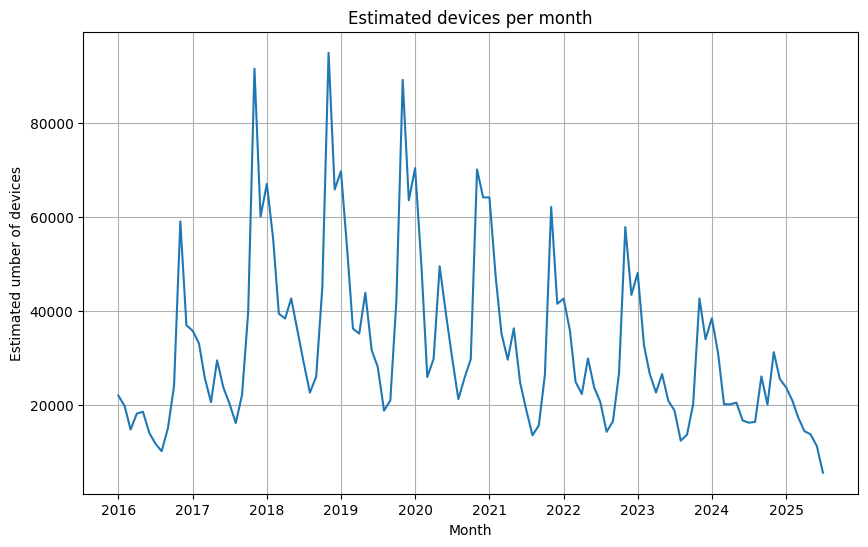

#### Lineplot of estimated reach in target audience

Note: Here we use [200.000 students](https://de.statista.com/statistik/daten/studie/181643/umfrage/studienanfaenger-an-hochschulen-nach-faechergruppen/) as an estimate for the number of students with mathematics in the first semester.

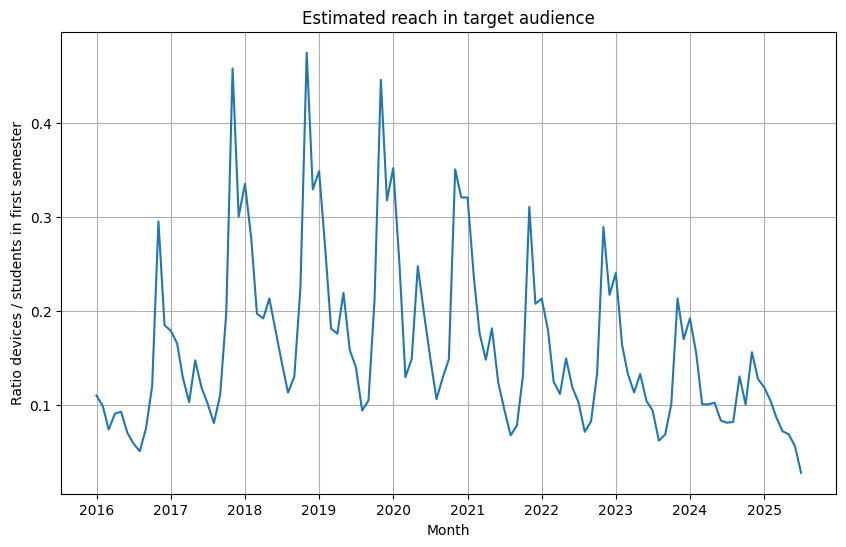

### Grundlagen der Mathematik

#### Lineplot of estimated devices per month

Note: On average there are [~2.8 pageviews per device per month](https://github.com/kulla/analytics-mfnf/blob/main/notebooks/reports/2025-07-16-pageviews-per-user-on-wikibooks.ipynb)

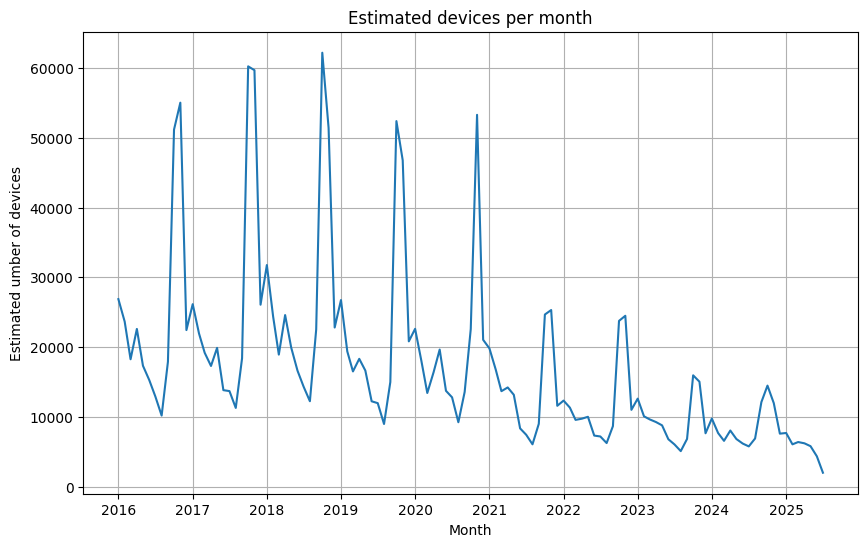

#### Lineplot of estimated reach in target audience

Note: Here we use [200.000 students](https://de.statista.com/statistik/daten/studie/181643/umfrage/studienanfaenger-an-hochschulen-nach-faechergruppen/) as an estimate for the number of students with mathematics in the first semester.

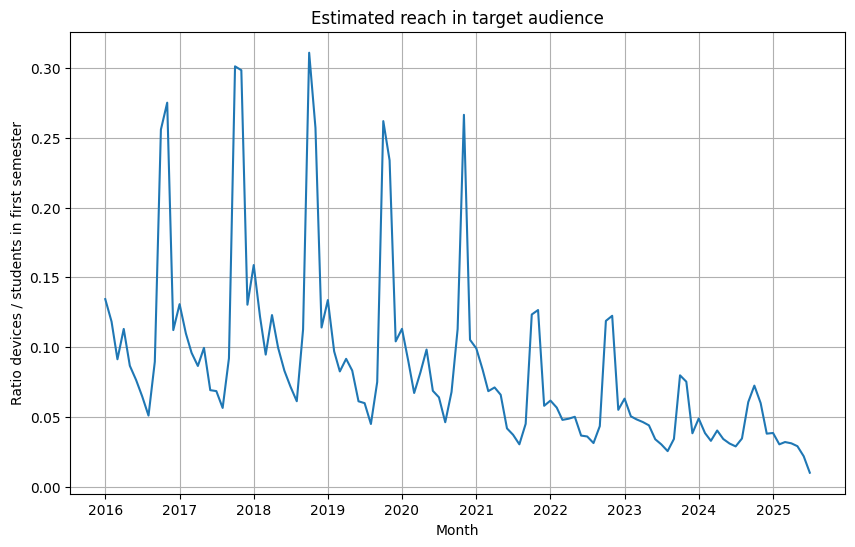

### Lineare Algebra 1

#### Lineplot of estimated devices per month

Note: On average there are [~2.8 pageviews per device per month](https://github.com/kulla/analytics-mfnf/blob/main/notebooks/reports/2025-07-16-pageviews-per-user-on-wikibooks.ipynb)

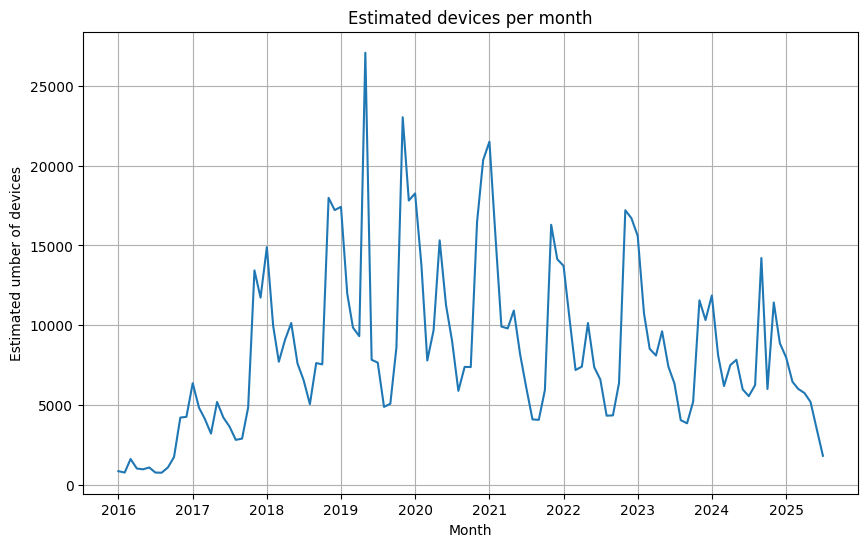

#### Lineplot of estimated reach in target audience

Note: Here we use [200.000 students](https://de.statista.com/statistik/daten/studie/181643/umfrage/studienanfaenger-an-hochschulen-nach-faechergruppen/) as an estimate for the number of students with mathematics in the first semester.

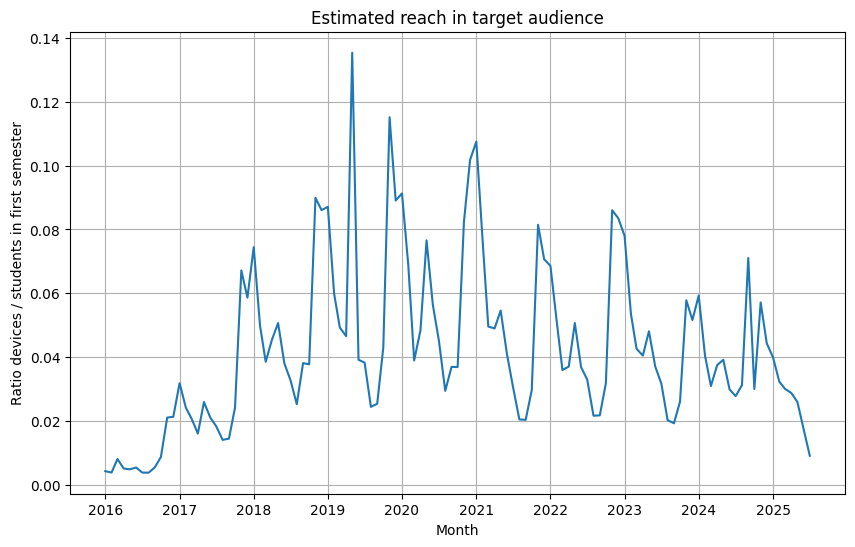

In [13]:
from mfnf import books

for book in ["Analysis 1", "Grundlagen der Mathematik", "Lineare Algebra 1"]:
    md(f"### {book}")

    analyze(df[df["book_name"] == book].copy())

## License of this report

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.